In [2]:
pip install openpyxl

  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import geopandas as gpd
import mapclassify
import xlrd

In [4]:
income = pd.read_excel('1_census_2016_Income_neighb_LHIN_7.xlsx', 
                        sheet_name='Income - Persons',
                        header = 13)
income.head()

,Unnamed: 0,Unnamed: 1,Total - Population to whom Low Income Concepts Are Applicable (Denominator),Total - In LICO-AT,Total - In LICO-AT [%],Total - Population to whom Low Income Concepts Are Applicable (0-17 yrs) (Denominator),Total - In LICO-AT (0-17 yrs),Total - In LICO-AT (0-17 yrs) [%],Total - Population to whom Low Income Concepts Are Applicable (0-5 yrs) (Denominator),Total - In LICO-AT (0-5 yrs),...,Population - Both.11,Population - Male.12,Population - Female.12,Population - Both.12,Population - Male.13,Population - Female.13,Population - Both.13,Population - Male.14,Population - Female.14,Population - Both.14
0,1.0,West Humber-Clairville,32700,4495,13.746177,6265,1025,16.360734,1815,345,...,26105,13715,13970,27670,3790,4920,8775,9895,9015,18945
1,2.0,Mount Olive-Silverstone-Jamestown,32825,7150,21.782178,8555,2550,29.807130,2670,880,...,23845,12370,13360,25740,3825,5905,9720,8540,7475,16000
2,3.0,Thistletown-Beaumond Heights,10120,1485,14.673913,2085,435,20.863309,630,165,...,7945,4080,4320,8400,1220,1740,2970,2850,2575,5415
3,4.0,Rexdale-Kipling,10355,1645,15.886045,1995,450,22.556391,660,160,...,8270,4225,4495,8725,1215,1680,2880,3005,2825,5845
4,5.0,Elms-Old Rexdale,9455,1695,17.927023,2210,590,26.696833,655,190,...,7170,3625,4025,7630,1130,1575,2710,2485,2440,4935


In [5]:
income = income[income.columns[[0, 1, 20]]]
income.head()

,Unnamed: 0,Unnamed: 1,Total - In LIM-AT [%]
0,1.0,West Humber-Clairville,15.764526
1,2.0,Mount Olive-Silverstone-Jamestown,27.844631
2,3.0,Thistletown-Beaumond Heights,17.786561
3,4.0,Rexdale-Kipling,18.686625
4,5.0,Elms-Old Rexdale,23.268112


In [6]:
colnames = {'Unnamed: 0': 'Neighbid',
           'Unnamed: 1' : 'name',
           'Total - In LIM-AT [%]' : 'low_income_rate'}

income = income.copy()

income.rename(columns = colnames, inplace=True)

income.columns

Index(['Neighbid', 'name', 'low_income_rate'], dtype='object')

In [7]:
disease = pd.read_excel('1_AHD_2017_RPDB_Neighb_LHIN_7.xlsx', 
                        sheet_name='Diabetes_Neighb_Toronto',
                        header = 13)
disease.head()

,Unnamed: 0,Unnamed: 1,Male,Female,Both sexes,Male.1,Female.1,Both sexes.1,Male.2,Female.2,...,Female.12,Both sexes.12,"Rate Ratio**, Both sexes.4","H/ L/ NS, Both sexes.4","(95% CI) LL, Male.4","(95% CI) UL, Male.4","(95% CI) LL, Female.4","(95% CI) UL, Female.4","(95% CI) LL, Both sexes.4","(95% CI) UL, Both sexes.4"
0,1,West Humber-Clairville,2645,2486,5131,14042,14088,28130,15.6,15.8,...,39.6,42.4,1.27,H,43.5,47.5,37.8,41.4,41.0,43.7
1,2,Mount Olive-Silverstone-Jamestown,2367,2355,4722,12344,13279,25623,16.8,17.3,...,44.1,45.5,1.36,H,44.8,49.4,41.9,46.2,43.9,47.1
2,3,Thistletown-Beaumond Heights,726,731,1457,4034,4193,8227,14.3,14.7,...,35.5,37.4,1.12,H,36.2,43.1,32.5,38.5,35.1,39.6
3,4,Rexdale-Kipling,738,790,1528,4201,4551,8752,13.5,14.4,...,38.8,40.3,1.21,H,38.8,45.7,35.8,41.7,38.1,42.5
4,5,Elms-Old Rexdale,612,668,1280,3621,3896,7517,13.8,15.0,...,35.7,37.4,1.12,H,35.5,43.5,32.3,39.2,34.8,40.0


In [8]:
disease.columns

Index(['Unnamed: 0', 'Unnamed: 1', '  Male', 'Female', 'Both sexes',
       '  Male.1', 'Female.1', 'Both sexes.1', '  Male.2', 'Female.2',
       'Both sexes.2', 'Rate Ratio**, Both sexes', 'H/ L/ NS, Both sexes',
       '(95% CI) LL, Male', '(95% CI) UL,  Male', '(95% CI) LL, Female',
       '(95% CI) UL, Female', '(95% CI) LL, Both sexes',
       '(95% CI) UL, Both sexes', '  Male.3', 'Female.3', 'Both sexes.3',
       'Rate Ratio**, Both sexes.1', 'H/ L/ NS, Both sexes.1',
       '(95% CI) LL, Male.1', '(95% CI) UL,  Male.1', '(95% CI) LL, Female.1',
       '(95% CI) UL, Female.1', '(95% CI) LL, Both sexes.1',
       '(95% CI) UL, Both sexes.1', '  Male.4', 'Female.4', 'Both sexes.4',
       '  Male.5', 'Female.5', 'Both sexes.5', '  Male.6',
       '  Male, Report with caution (*), Numerator', 'Female.6',
       'Both sexes.6', 'Rate Ratio**, Both sexes.2', 'H/ L/ NS, Both sexes.2',
       '(95% CI) LL, Male.2', '(95% CI) UL,  Male.2', '(95% CI) LL, Female.2',
       '(95% CI) UL,

In [9]:
diabetes = disease[disease.columns[[0, 1, 10]]]
diabetes.head()

,Unnamed: 0,Unnamed: 1,Both sexes.2
0,1,West Humber-Clairville,15.8
1,2,Mount Olive-Silverstone-Jamestown,17.1
2,3,Thistletown-Beaumond Heights,14.5
3,4,Rexdale-Kipling,14.0
4,5,Elms-Old Rexdale,14.4


In [10]:
colnames = {'Unnamed: 0': 'Neighbid',
           'Unnamed: 1' : 'name',
           'Both sexes.2' : 'diabetes_rates'}

diabetes = diabetes.copy()

diabetes.rename(columns = colnames, inplace=True)

diabetes.columns

Index(['Neighbid', 'name', 'diabetes_rates'], dtype='object')

In [11]:
diabetes_income = diabetes.merge(income, on = ['Neighbid', 'name'])
diabetes_income.head()

,Neighbid,name,diabetes_rates,low_income_rate
0,1,West Humber-Clairville,15.8,15.764526
1,2,Mount Olive-Silverstone-Jamestown,17.1,27.844631
2,3,Thistletown-Beaumond Heights,14.5,17.786561
3,4,Rexdale-Kipling,14.0,18.686625
4,5,Elms-Old Rexdale,14.4,23.268112


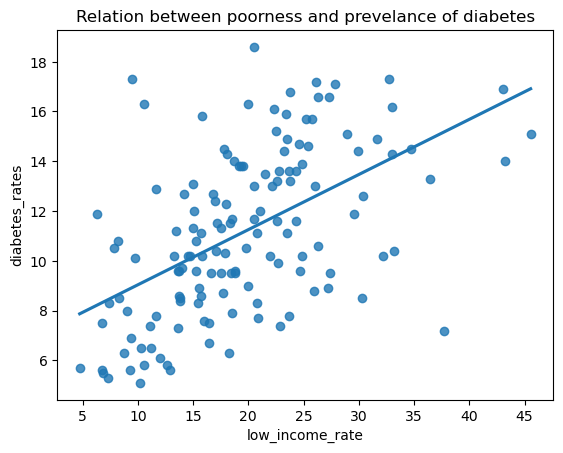

In [12]:
sns.regplot(y = 'diabetes_rates', x = 'low_income_rate', data = diabetes_income, ci = None);

plt.title("Relation between poorness and prevelance of diabetes");

In [13]:
from statsmodels.formula.api import ols

reg_diabetinc = ols('diabetes_rates ~ low_income_rate', data = diabetes_income) # setup the model

reg_diabetinc_fit = reg_diabetinc.fit() # estimate/fit the model 

In [14]:
reg_diabetinc_fit_summ = reg_diabetinc_fit.summary()

reg_diabetinc_fit_summ.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.8209,0.634,10.763,0.000,5.568,8.074
low_income_rate,0.2216,0.030,7.380,0.000,0.162,0.281


$$\texttt{diabetes_rates} = 6.8209  - 0.2216 \times \texttt{low_income_rate}$$

In [15]:
nbrhd = gpd.GeoDataFrame.from_file("Toronto_Neighbourhoods.geojson")
nbrhd.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


,AREA_ATTR_ID,AREA_DESC,AREA_ID,AREA_LONG_CODE,AREA_NAME,AREA_SHORT_CODE,CLASSIFICATION,CLASSIFICATION_CODE,LATITUDE,LONGITUDE,OBJECTID,PARENT_AREA_ID,Shape__Area,Shape__Length,X,Y,_id,geometry
0,26005521,Casa Loma (96),2480141,096,Casa Loma (96),096,NaN,NaN,NaN,NaN,17545105,NaN,3.678385e+06,8214.176485,NaN,NaN,1,"POLYGON ((-79.41469 43.67391, -79.41485 43.674..."
1,26005520,Annex (95),2480140,095,Annex (95),095,NaN,NaN,NaN,NaN,17545121,NaN,5.337192e+06,10513.883143,NaN,NaN,2,"POLYGON ((-79.39414 43.66872, -79.39588 43.668..."
2,26005519,Caledonia-Fairbank (109),2480139,109,Caledonia-Fairbank (109),109,NaN,NaN,NaN,NaN,17545137,NaN,2.955857e+06,6849.911724,NaN,NaN,3,"POLYGON ((-79.46021 43.68156, -79.46044 43.681..."
3,26005444,Woodbine Corridor (64),2480064,064,Woodbine Corridor (64),064,NaN,NaN,NaN,NaN,17545153,NaN,3.052518e+06,7512.966773,NaN,NaN,4,"POLYGON ((-79.31485 43.66674, -79.31660 43.666..."
4,26005443,Lawrence Park South (103),2480063,103,Lawrence Park South (103),103,NaN,NaN,NaN,NaN,17545169,NaN,6.211341e+06,13530.370002,NaN,NaN,5,"POLYGON ((-79.41096 43.70408, -79.41165 43.703..."


In [16]:
#get gdf ready

important_spat_cols = nbrhd.columns[[4, 5, 17]]
colnames_spat = {important_spat_cols[0]: 'name',
           important_spat_cols[1] : 'nbrhd_spat_id',
           important_spat_cols[2] : 'geometry'}

nbrhd_simple = nbrhd.copy()

nbrhd_simple = nbrhd_simple[important_spat_cols]

nbrhd_simple.rename(columns = colnames_spat, inplace=True)

# Notice that the "nbrhd_spat_id" is a string and not a number... that may be an issue
print("The data type of nbrhd_spat_id is: ", type(nbrhd_simple["nbrhd_spat_id"][0]))
nbrhd_simple.head()

The data type of nbrhd_spat_id is:  <class 'str'>


,name,nbrhd_spat_id,geometry
0,Casa Loma (96),096,"POLYGON ((-79.41469 43.67391, -79.41485 43.674..."
1,Annex (95),095,"POLYGON ((-79.39414 43.66872, -79.39588 43.668..."
2,Caledonia-Fairbank (109),109,"POLYGON ((-79.46021 43.68156, -79.46044 43.681..."
3,Woodbine Corridor (64),064,"POLYGON ((-79.31485 43.66674, -79.31660 43.666..."
4,Lawrence Park South (103),103,"POLYGON ((-79.41096 43.70408, -79.41165 43.703..."


In [17]:
#create a new variable in the nbrhd_simple geodataframe and store the new number
#version of the neighbourhood id here
nbrhd_simple["Neighbid"] = nbrhd_simple["nbrhd_spat_id"].astype(int)

#we can sort by the id - and check to see if they line up with the asthma data 
nbrhd_simple.sort_values('Neighbid').head()

,name,nbrhd_spat_id,geometry,Neighbid
30,West Humber-Clairville (1),001,"POLYGON ((-79.55236 43.70947, -79.55238 43.709...",1
40,Mount Olive-Silverstone-Jamestown (2),002,"POLYGON ((-79.60338 43.75786, -79.60205 43.758...",2
124,Thistletown-Beaumond Heights (3),003,"POLYGON ((-79.57751 43.73384, -79.57806 43.734...",3
122,Rexdale-Kipling (4),004,"POLYGON ((-79.55512 43.71510, -79.55504 43.714...",4
22,Elms-Old Rexdale (5),005,"POLYGON ((-79.55512 43.71510, -79.55569 43.716...",5


In [18]:
nbrhd_diabetes_income = nbrhd_simple.merge(diabetes_income, on="Neighbid")
nbrhd_diabetes_income.head()

,name_x,nbrhd_spat_id,geometry,Neighbid,name_y,diabetes_rates,low_income_rate
0,Casa Loma (96),096,"POLYGON ((-79.41469 43.67391, -79.41485 43.674...",96,Casa Loma,5.8,12.650602
1,Annex (95),095,"POLYGON ((-79.39414 43.66872, -79.39588 43.668...",95,Annex,6.3,18.250483
2,Caledonia-Fairbank (109),109,"POLYGON ((-79.46021 43.68156, -79.46044 43.681...",109,Caledonia-Fairbank,12.7,14.220877
3,Woodbine Corridor (64),064,"POLYGON ((-79.31485 43.66674, -79.31660 43.666...",64,Woodbine Corridor,8.6,15.740741
4,Lawrence Park South (103),103,"POLYGON ((-79.41096 43.70408, -79.41165 43.703...",103,Lawrence Park South,5.3,7.279947


<AxesSubplot: >

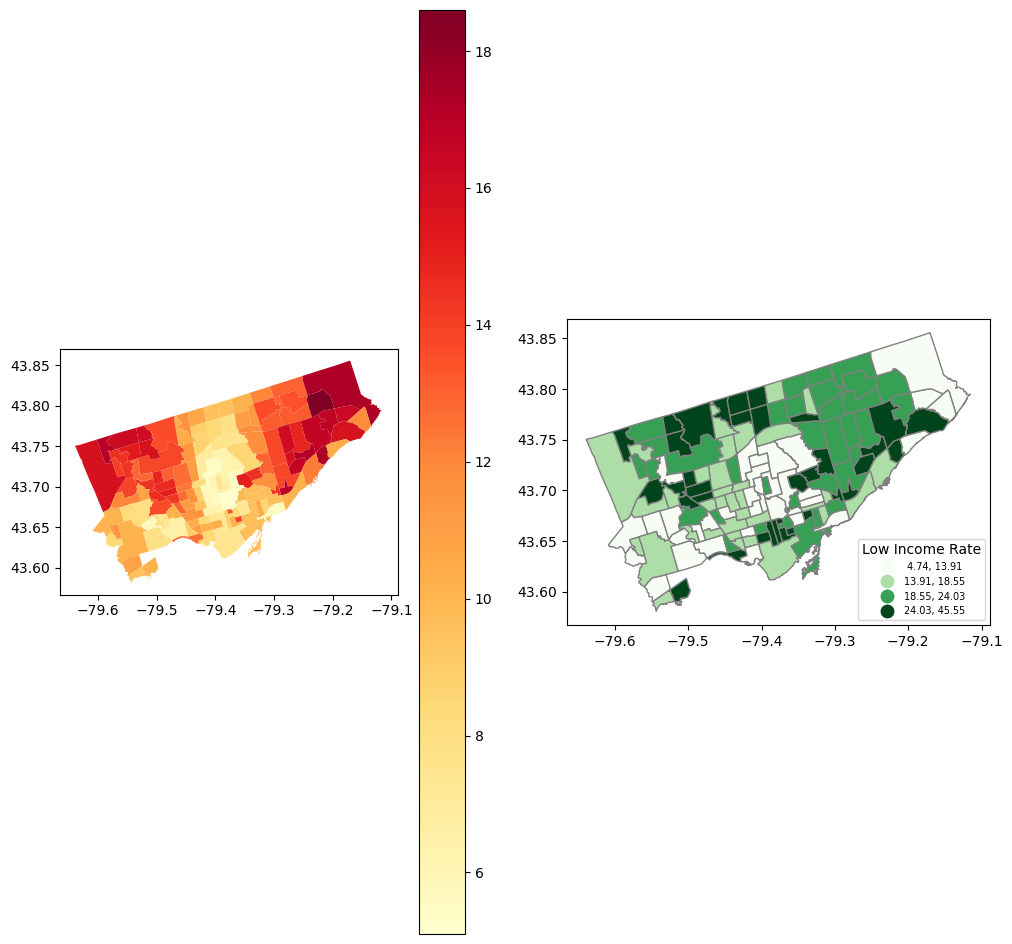

In [19]:
#generate our figure/axes and set fig size
fig, axes = plt.subplots(1, 2, figsize = (12,12))

ax1 = axes[0]
#let's map asthma percent rates across toronto!
nbrhd_diabetes_income.plot(column = "diabetes_rates",
                  legend = True, ax = ax1, 
                  cmap = "YlOrRd")

ax2 = axes[1]
nbrhd_diabetes_income.plot(column='low_income_rate', scheme='quantiles', 
                  k=4, cmap='Greens', edgecolor='grey', 
                  ax = ax2, legend=True, 
                  legend_kwds={'loc': 4, 'title': 'Low Income Rate',
                               'title_fontsize': 10,'fontsize': 7})

In [32]:
median_low_income = diabetes_income['low_income_rate'].median()
median_low_income

18.5485796132729

In [12]:
diabetes_income = diabetes_income.copy()

diabetes_income.loc[diabetes_income['low_income_rate'] >= median_low_income, 'Poverty'] = 'High'

diabetes_income.loc[diabetes_income['low_income_rate'] < median_low_income, 'Poverty'] = 'Low'

diabetes_income.head()

,Neighbid,name,diabetes_rates,low_income_rate,Poverty
0,1,West Humber-Clairville,15.8,15.764526,Low
1,2,Mount Olive-Silverstone-Jamestown,17.1,27.844631,High
2,3,Thistletown-Beaumond Heights,14.5,17.786561,Low
3,4,Rexdale-Kipling,14.0,18.686625,High
4,5,Elms-Old Rexdale,14.4,23.268112,High


In [13]:
mean_table = diabetes_income.groupby('Poverty')['diabetes_rates'].mean()
mean_table

Poverty
High    12.864286
Low      9.418841
Name: diabetes_rates, dtype: float64

In [14]:
observed_mean_difference = mean_table.iloc[0] - mean_table.iloc[1]
observed_mean_difference

3.4454451345755697

In [15]:
def random_shuffle_mean():
    # step 1
    poverty_shuffle = diabetes_income['Poverty'].sample(frac = 1, replace=False).reset_index(drop = True)
    
    #step 2
    poverty_high_shuffle = diabetes_income.loc[poverty_shuffle == 'High', 'diabetes_rates'].mean()
    poverty_low_shuffle  = diabetes_income.loc[poverty_shuffle == 'Low', 'diabetes_rates'].mean()
    
    #step 3
    shuffled_diff = poverty_high_shuffle - poverty_low_shuffle 
    
    return shuffled_diff   

In [16]:
random_shuffle_mean()

0.19923395445134418

In [17]:
shuffled_diffs = []

for _ in range(5000):
    shuffled_diffs.append(random_shuffle_mean())

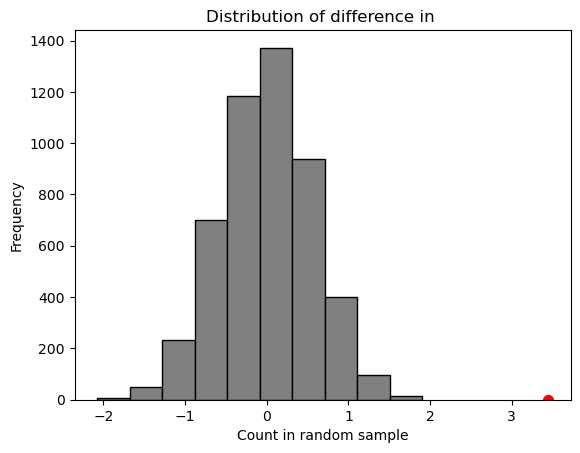

In [21]:
import matplotlib.pyplot as plt

plt.hist(shuffled_diffs, color = 'grey', edgecolor = 'black')

plt.title('Distribution of difference in ')
plt.xlabel('Count in random sample')
plt.ylabel('Frequency')
plt.scatter(observed_mean_difference, 0, color = 'red', s =50);

In [19]:
def pvalue2(shuff_diffs, obs_diffs):
    
    rightextreme_count = (shuff_diffs >= obs_diffs).sum()
    
    leftextreme_count = (shuff_diffs < -1*obs_diffs).sum()
    
    allextreme = rightextreme_count + leftextreme_count
    
    pval = allextreme / len(shuff_diffs)
    
    return pval  

In [20]:
pvalue2(shuff_diffs = shuffled_diffs, obs_diffs = observed_mean_difference)

0.0

The null hypothesis is false, and there is a difference between high and low poverty.

In [ ]:
disease = pd.read_excel('1_AHD_2017_RPDB_Neighb_LHIN_7.xlsx', 
                        sheet_name='Diabetes_Neighb_Toronto',
                        header = 12)
new_names = {
    ("Neighb ID", "Unnamed: 0_level_1"): "Neighb ID",
    ("Neighbourhood Name", "Unnamed: 1_level_1"): "Neighbourhood Name"
}
disease.rename(columns=new_names, inplace= True)

In [58]:
disease = pd.read_excel('1_AHD_2017_RPDB_Neighb_LHIN_7.xlsx', 
                        sheet_name='Diabetes_Neighb_Toronto',
                        header = [12,13])
new_names = {
    ("Neighb ID", "Unnamed: 0_level_1"): "Neighb ID",
    ("Neighbourhood Name", "Unnamed: 1_level_1"): "Neighbourhood Name"
}
disease.rename(columns=new_names, inplace= True)

In [ ]:
disease[("Neighb ID", "Unnamed: 0_level_1")]

In [60]:
disease.head()

Neighb ID                 Neighbourhood Name  \
  Unnamed: 0_level_1                 Unnamed: 1_level_1   
0                  1             West Humber-Clairville   
1                  2  Mount Olive-Silverstone-Jamestown   
2                  3       Thistletown-Beaumond Heights   
3                  4                    Rexdale-Kipling   
4                  5                   Elms-Old Rexdale   

  # of people with Diabetes 2016/17 ±, All Ages 20+                    \
                                               Male Female Both sexes   
0                                              2645   2486       5131   
1                                              2367   2355       4722   
2                                               726    731       1457   
3                                               738    790       1528   
4                                               612    668       1280   

  Total Population 2016 (RPDB) ª, All Ages 20+                    \
                                          Male Female Both sexes   
0                                        14042  14088      28130   
1                                        12344  13279      25623   
2                                         4034   4193       8227   
3                                         4201   4551       8752   
4                                         3621   3896       7517   

   Age-Standardized † rate (/100) of Diabetes (2016/17), All Ages 20+         \
                                                                 Male Female   
0                                               15.6                    15.8   
1                                               16.8                    17.3   
2                                               14.3                    14.7   
3                                               13.5                    14.4   
4                                               13.8                    15.0   

   ... Prevalence (/100) of Diabetes (2016/17), Age 65+             \
   ...                                           Female Both sexes   
0  ...                                             39.6       42.4   
1  ...                                             44.1       45.5   
2  ...                                             35.5       37.4   
3  ...                                             38.8       40.3   
4  ...                                             35.7       37.4   

                                                                   \
  Rate Ratio**, Both sexes H/ L/ NS, Both sexes (95% CI) LL, Male   
0                     1.27                    H              43.5   
1                     1.36                    H              44.8   
2                     1.12                    H              36.2   
3                     1.21                    H              38.8   
4                     1.12                    H              35.5   

                                                              \
  (95% CI) UL,  Male (95% CI) LL, Female (95% CI) UL, Female   
0               47.5                37.8                41.4   
1               49.4                41.9                46.2   
2               43.1                32.5                38.5   
3               45.7                35.8                41.7   
4               43.5                32.3                39.2   

                                                   
  (95% CI) LL, Both sexes (95% CI) UL, Both sexes  
0                    41.0                    43.7  
1                    43.9                    47.1  
2                    35.1                    39.6  
3                    38.1                    42.5  
4                    34.8                    40.0  

[5 rows x 82 columns]

In [57]:
new_names = {}

# subset_time_use_data_colnames = subset_time_use_data.rename(columns = new_name)

for col in disease.columns:
    x, y = col
    new_name = ""
    if not "Unnamed"  in x:
        new_name += x
    if not "Unnamed"  in y:
        new_name += y
    new_names[col] = new_name
d = disease.rename(columns=new_names)
print(new_names)
d.head()

{('Neighb ID', 'Unnamed: 0_level_1'): 'Neighb ID', ('Neighbourhood Name', 'Unnamed: 1_level_1'): 'Neighbourhood Name', ('# of people with Diabetes 2016/17 ±, All Ages 20+', '  Male'): '# of people with Diabetes 2016/17 ±, All Ages 20+  Male', ('# of people with Diabetes 2016/17 ±, All Ages 20+', 'Female'): '# of people with Diabetes 2016/17 ±, All Ages 20+Female', ('# of people with Diabetes 2016/17 ±, All Ages 20+', 'Both sexes'): '# of people with Diabetes 2016/17 ±, All Ages 20+Both sexes', ('Total Population 2016 (RPDB) ª, All Ages 20+', '  Male'): 'Total Population 2016 (RPDB) ª, All Ages 20+  Male', ('Total Population 2016 (RPDB) ª, All Ages 20+', 'Female'): 'Total Population 2016 (RPDB) ª, All Ages 20+Female', ('Total Population 2016 (RPDB) ª, All Ages 20+', 'Both sexes'): 'Total Population 2016 (RPDB) ª, All Ages 20+Both sexes', (' Age-Standardized † rate (/100) of Diabetes (2016/17), All Ages 20+', '  Male'): ' Age-Standardized † rate (/100) of Diabetes (2016/17), All Ages 20+

Neighb ID                 Neighbourhood Name  \
  Unnamed: 0_level_1                 Unnamed: 1_level_1   
0                  1             West Humber-Clairville   
1                  2  Mount Olive-Silverstone-Jamestown   
2                  3       Thistletown-Beaumond Heights   
3                  4                    Rexdale-Kipling   
4                  5                   Elms-Old Rexdale   

  # of people with Diabetes 2016/17 ±, All Ages 20+                    \
                                               Male Female Both sexes   
0                                              2645   2486       5131   
1                                              2367   2355       4722   
2                                               726    731       1457   
3                                               738    790       1528   
4                                               612    668       1280   

  Total Population 2016 (RPDB) ª, All Ages 20+                    \
                                          Male Female Both sexes   
0                                        14042  14088      28130   
1                                        12344  13279      25623   
2                                         4034   4193       8227   
3                                         4201   4551       8752   
4                                         3621   3896       7517   

   Age-Standardized † rate (/100) of Diabetes (2016/17), All Ages 20+         \
                                                                 Male Female   
0                                               15.6                    15.8   
1                                               16.8                    17.3   
2                                               14.3                    14.7   
3                                               13.5                    14.4   
4                                               13.8                    15.0   

   ... Prevalence (/100) of Diabetes (2016/17), Age 65+             \
   ...                                           Female Both sexes   
0  ...                                             39.6       42.4   
1  ...                                             44.1       45.5   
2  ...                                             35.5       37.4   
3  ...                                             38.8       40.3   
4  ...                                             35.7       37.4   

                                                                   \
  Rate Ratio**, Both sexes H/ L/ NS, Both sexes (95% CI) LL, Male   
0                     1.27                    H              43.5   
1                     1.36                    H              44.8   
2                     1.12                    H              36.2   
3                     1.21                    H              38.8   
4                     1.12                    H              35.5   

                                                              \
  (95% CI) UL,  Male (95% CI) LL, Female (95% CI) UL, Female   
0               47.5                37.8                41.4   
1               49.4                41.9                46.2   
2               43.1                32.5                38.5   
3               45.7                35.8                41.7   
4               43.5                32.3                39.2   

                                                   
  (95% CI) LL, Both sexes (95% CI) UL, Both sexes  
0                    41.0                    43.7  
1                    43.9                    47.1  
2                    35.1                    39.6  
3                    38.1                    42.5  
4                    34.8                    40.0  

[5 rows x 82 columns]